# Data Analysis on the Brazilian E-Commerce Public Dataset by Olist
Author : Kelompok 18-D [Arif Widagdo, Jonatan Jeremi, Muhammad Idz, Wandi Wardiman]

Description : This notebook is our first assignment at SIB E-Commerce to take the first step in implementing data cleaning, data integration and data visualization

Outline :
1. Data Cleaning
2. Data Integration
3. Visualisasi Data

## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

## Data Extraction

In [2]:
## read list dataset in directory data
os.listdir("../data")

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [3]:
## check empty value
missing_values = ["?","N/a","na",np.nan]
## read dataset
olist_customers = pd.read_csv("../data/olist_customers_dataset.csv" , na_values = missing_values)
olist_geolocation = pd.read_csv("../data/olist_geolocation_dataset.csv" , na_values = missing_values)
olist_order_items = pd.read_csv("../data/olist_order_items_dataset.csv" , na_values = missing_values)
olist_order_payments = pd.read_csv("../data/olist_order_payments_dataset.csv" , na_values = missing_values)
olist_order_reviews = pd.read_csv("../data/olist_order_reviews_dataset.csv" , na_values = missing_values)
olist_orders = pd.read_csv("../data/olist_orders_dataset.csv" , na_values = missing_values)
olist_products = pd.read_csv("../data/olist_products_dataset.csv" , na_values = missing_values)
olist_sellers = pd.read_csv("../data/olist_sellers_dataset.csv" , na_values = missing_values)
product_category_name_translation= pd.read_csv("../data/product_category_name_translation.csv" , na_values = missing_values)

## 1. Data Cleaning

### - olist_customers_dataset

In [4]:
olist_customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


### - olist_geolocation_dataset

In [5]:
olist_geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


### - olist_order_items_dataset

In [6]:
olist_order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


### - olist_order_payments_dataset

In [7]:
olist_order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


### - olist_order_reviews_dataset

In [8]:
olist_order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


#### check empty value in olist_order_reviews_dataset

In [9]:
olist_order_reviews.shape

(99224, 7)

In [10]:
olist_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87657
review_comment_message     58251
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [11]:
olist_order_reviews.isnull().any()

review_id                  False
order_id                   False
review_score               False
review_comment_title        True
review_comment_message      True
review_creation_date       False
review_answer_timestamp    False
dtype: bool

<AxesSubplot:>

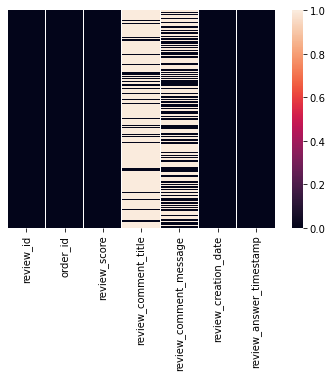

In [12]:
sns.heatmap(olist_order_reviews.isnull(), yticklabels=False)

#### solution

In [13]:
## remove review_comment_title column & review_comment_message column 
olist_order_reviews = olist_order_reviews.drop(['review_comment_title'], axis=1)
olist_order_reviews = olist_order_reviews.drop(['review_comment_message'], axis=1)
olist_order_reviews.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13


In [14]:
olist_order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### - olist_orders_dataset

In [15]:
olist_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


#### check empty value in olist_orders_dataset

In [16]:
olist_orders.shape

(99441, 8)

In [17]:
olist_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
olist_orders.isnull().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

#### solution

In [19]:
## if all the columns do not contain values then use the following source code :
## olist_orders2 = olist_orders.dropna(how='all')

## else if only some values are missing in the column and you don't want to delete those rows, 
## you can use the following source code: 
## olist_orders2 = olist_orders.fillna(0)

## else if only some values are missing in the column and you want to fill those data with the values in the previous row (duplicates), 
## you can use the following source code :
## olist_orders2 = olist_orders.fillna(method='ffill')

## else if only some values are missing in the column and you want to fill those data with the values in the next row (duplicates), 
## you can use the following source code :
## olist_products2 = olist_products.fillna(method='bfill')

## you can use the following source code :
## olist_products2 = olist_products.interpolate()


olist_orders2 = olist_orders.dropna()
olist_orders2.shape

(96461, 8)

In [20]:
olist_orders2.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### - olist_products_dataset

In [21]:
olist_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


#### check empty value in olist_orders_dataset

In [22]:
olist_products.shape

(32951, 9)

In [23]:
olist_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [24]:
olist_products.isnull().any()

product_id                    False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

<AxesSubplot:>

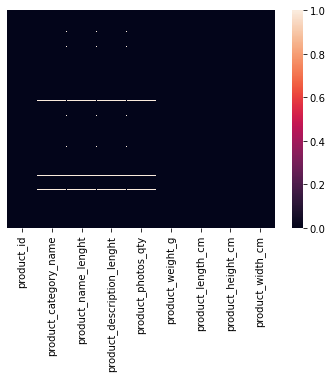

In [25]:
sns.heatmap(olist_products.isnull(), yticklabels=False)

#### Solution

In [26]:
## if all the columns don't contain values and want to omit them, then use the following source code
## olist_products2 = olist_products.dropna(how='all')

## else if only some values are missing in the column and you don't want to delete those rows, 
## you can use the following source code: 
## olist_products2 = olist_products.fillna(0)
## olist_products2.shape

## else if only some values are missing in the column and you want to fill those data with the values in the previous row (duplicates), 
## you can use the following source code :
olist_products2 = olist_products.fillna(method='ffill')
olist_products2.shape

## else if only some values are missing in the column and you want to fill those data with the values in the next row (duplicates), 
## you can use the following source code :
## olist_products2 = olist_products.fillna(method='bfill')

## you can use the following source code :
## olist_products2 = olist_products.interpolate()

## else if there is a missing value in the column and you want to remove that row, 
## then use the following source code:
## olist_products2 = olist_products.dropna()

(32951, 9)

In [27]:
olist_products2.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### - olist_sellers_dataset

In [28]:
olist_sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


### - product_category_name_translation

In [29]:
product_category_name_translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


## 2. Data Integration

In [30]:
## pd.concat
## pd.merge
## pd.append

In [31]:
olist_geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


### Merge

#### 1. merge dataframe olist_products2 with product_category_name_translation

In [32]:
olist_products2.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [33]:
product_category_name_translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [34]:
## this cell merge dataframe olist_products2 with product_category_name_translation
olist_products_category=pd.merge(olist_products2, product_category_name_translation, on='product_category_name', how='left')
olist_products_category.columns.tolist()

['product_id',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_category_name_english']

In [35]:
new_olist_products_category= olist_products_category[[
 'product_id',
 'product_category_name',
 'product_category_name_english',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm'
]]
new_olist_products_category.head(2)

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


#### 2. merge dataframe olist_orders2 with olist_customers

In [36]:
## this cell merge dataframe olist_customers with new_olist_orders
customers_order= pd.merge(olist_orders2, olist_customers, on='customer_id', how='left')
customers_order.columns.tolist()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state']

In [37]:
new_customers_order=customers_order[[
    'order_id',
    'customer_id',
    'customer_unique_id',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state',
    'order_status',
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date']]
new_customers_order.head()

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [38]:
new_customers_order.isnull().sum()

order_id                         0
customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### 3. merge dataframe olist_order_items,olist_order_payments, and olist_order_reviews

In [39]:
olist_order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [40]:
olist_order_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [41]:
olist_order_reviews.head(1)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59


In [42]:
olist_product_orders = pd.merge(pd.merge(olist_order_items,olist_order_payments, on='order_id'),olist_order_reviews,on='order_id', how='inner')
olist_product_orders.columns.tolist()

['order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'review_id',
 'review_score',
 'review_creation_date',
 'review_answer_timestamp']

In [43]:
new_olist_product_orders = olist_product_orders[[
 'order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'review_id',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'review_score',
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp'
]]
new_olist_product_orders.head()

,order_id,order_item_id,product_id,seller_id,review_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,shipping_limit_date,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,97ca439bc427b48bc1cd7177abe71365,58.90,13.29,1,credit_card,2,72.19,5,2017-09-19 09:45:35,2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,7b07bacd811c4117b742569b04ce3580,239.90,19.93,1,credit_card,3,259.83,4,2017-05-03 11:05:13,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,0c5b33dea94867d1ac402749e5438e8b,199.00,17.87,1,credit_card,5,216.87,5,2018-01-18 14:48:30,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,f4028d019cb58564807486a6aaf33817,12.99,12.79,1,credit_card,2,25.78,4,2018-08-15 10:10:18,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,940144190dcba6351888cafa43f3a3a5,199.90,18.14,1,credit_card,3,218.04,5,2017-02-13 13:57:51,2017-03-02 00:00:00,2017-03-03 10:54:59


#### 4. merge dataframe customers_order, olist_product_orders

In [44]:
olist_customers_orders = pd.merge(customers_order,olist_product_orders, on='order_id', how='inner')
olist_customers_orders.columns.tolist()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'review_id',
 'review_score',
 'review_creation_date',
 'review_answer_timestamp']

In [45]:
new_olist_customers_orders=olist_customers_orders[[
 'order_id',
 'customer_id',
 'product_id',   
 'seller_id',    
 'review_id',   
 'customer_unique_id',  
 'order_item_id',
 'order_status',
 'price',
 'payment_value',    
 'payment_type',
 'payment_sequential',
 'payment_installments',
 'customer_state',
 'customer_city', 
 'customer_zip_code_prefix',
 'review_score',      
 'freight_value',  
 'order_approved_at',
 'order_purchase_timestamp',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',                  
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp'
                       ]]
new_olist_customers_orders.head()

,order_id,customer_id,product_id,seller_id,review_id,customer_unique_id,order_item_id,order_status,price,payment_value,...,review_score,freight_value,order_approved_at,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,a54f0611adc9ed256b57ede6b6eb5114,7c396fd4830fd04220f754e42b4e5bff,1,delivered,29.99,18.12,...,4,8.72,2017-10-02 11:07:15,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,a54f0611adc9ed256b57ede6b6eb5114,7c396fd4830fd04220f754e42b4e5bff,1,delivered,29.99,2.00,...,4,8.72,2017-10-02 11:07:15,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,a54f0611adc9ed256b57ede6b6eb5114,7c396fd4830fd04220f754e42b4e5bff,1,delivered,29.99,18.59,...,4,8.72,2017-10-02 11:07:15,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,8d5266042046a06655c8db133d120ba5,af07308b275d755c9edb36a90c618231,1,delivered,118.70,141.46,...,4,22.76,2018-07-26 03:24:27,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,e73b67b67587f7644d5bd1a52deb1b01,3a653a41f6f9fc3d2a113cf8398680e8,1,delivered,159.90,179.12,...,5,19.22,2018-08-08 08:55:23,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,2018-08-18 00:00:00,2018-08-22 19:07:58


In [46]:
## merge dataframe olist_customers_orders with olist_sellers
olist_customers_orders = pd.merge(olist_sellers,olist_customers_orders, on='seller_id', how='inner')
olist_customers_orders.columns.tolist()

['seller_id',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_item_id',
 'product_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'review_id',
 'review_score',
 'review_creation_date',
 'review_answer_timestamp']

In [47]:
new_olist_customers_orders=olist_customers_orders[[
 'order_id',
 'customer_id',
 'product_id',   
 'seller_id',    
 'review_id',   
 'customer_unique_id',  
 'order_item_id',
 'order_status',
 'price',
 'payment_value',    
 'payment_type',
 'payment_sequential',
 'payment_installments',
 'customer_state',
 'customer_city', 
 'customer_zip_code_prefix',
 'seller_state',
 'seller_city',
 'seller_zip_code_prefix',
 'review_score',      
 'freight_value',  
 'order_approved_at',
 'order_purchase_timestamp',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',                  
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp'
                       ]]
new_olist_customers_orders.head()

,order_id,customer_id,product_id,seller_id,review_id,customer_unique_id,order_item_id,order_status,price,payment_value,...,review_score,freight_value,order_approved_at,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,review_creation_date,review_answer_timestamp
0,6d953888a914b67350d5bc4d48f2acab,a973c4e3ad82777add3fa188f91dacea,f4621f8ad6f54a2e3c408884068be46d,3442f8959a84dea7ee197c632cb2df15,b9b791819c5c1a5c6a4ffc7881f97fb5,b4527423469300ee354458e1b5f961be,1,delivered,101.7,117.62,...,1,15.92,2017-05-05 16:25:11,2017-05-05 16:12:29,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,2017-05-11 16:25:11,2017-06-01 00:00:00,2017-06-01 12:57:10
1,bc8a5de6abf5b14f98a6135a7fb46731,1554ffe702931a062b4383b109accf63,325a06bcce0da45b7f4ecf2797dd40e4,3442f8959a84dea7ee197c632cb2df15,cc77a6d63753c1d7b88b7c64630b97b9,af0f26435fade1ca984d9affda307199,2,delivered,10.8,158.80,...,3,2.42,2017-08-30 12:50:19,2017-08-30 11:47:52,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,2017-09-05 12:50:19,2017-09-02 00:00:00,2017-09-03 17:31:14
2,4a90af3e85dd563884e2afeab1091394,9d6837f9700a3441e7183bff3bc4eef0,ffb64e34a37740dafb6c88f1abd1fa61,3442f8959a84dea7ee197c632cb2df15,88980a9c50a6909fa1fe35ddab8fa1e2,f421a2a66b69dbfe6db0c87845281a90,1,delivered,106.2,115.76,...,5,9.56,2017-08-21 20:50:19,2017-08-21 20:35:44,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,2017-08-25 20:50:19,2017-08-31 00:00:00,2017-08-31 21:37:39
3,1887b26eba419ce20f6fe34a6f88e80a,23fe51c9d4d1b1cef50c57b3c0babf5e,765c417cdc38443aaa558a0159a98591,d1b65fc7debc3361ea86b5f14c68d2e2,9de1a1b5a62567638d90dcaa1ef7c90f,00ac9cd5c4ad19e16e7c6f6864711737,1,delivered,209.9,231.45,...,5,21.55,2017-04-28 14:35:15,2017-04-28 14:20:07,2017-05-02 13:39:21,2017-05-09 14:27:05,2017-06-01 00:00:00,2017-05-08 14:35:15,2017-05-10 00:00:00,2017-05-11 10:34:49
4,83f24bbc4f76a2730ba9c9cfa32e6d07,d49bac4ac7d77b956f2b185ab700fbf1,765c417cdc38443aaa558a0159a98591,d1b65fc7debc3361ea86b5f14c68d2e2,683598a96354d366237bdb8797a55c3d,51dc56123336c573f2977f5da81b17b9,1,delivered,209.9,231.45,...,5,21.55,2017-04-27 09:25:08,2017-04-27 09:09:44,2017-04-27 13:47:44,2017-05-04 13:20:07,2017-06-06 00:00:00,2017-05-05 09:25:08,2017-05-05 00:00:00,2017-05-08 11:08:59


### Join DataFrame

#### Join Cleaning Dataframe

In [48]:
## merge dataframe new_olist_product_orders with new_olist_products_category
result_order_products = pd.merge(new_olist_product_orders,new_olist_products_category,
                        on='product_id', how='inner')
new_result_order_products= result_order_products.dropna()
new_result_order_products.columns.tolist()

['order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'review_id',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'review_score',
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name',
 'product_category_name_english',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [49]:
## merge dataframe olist_customers_orders with olist_sellers
result_olist_customers_orders = pd.merge(new_olist_customers_orders,new_customers_order, 
                            on=[
                            'order_id',
                            'customer_id',
                            'customer_unique_id', 
                            'order_status',
                            'customer_state',
                            'customer_city',
                            'customer_zip_code_prefix',
                            'order_approved_at',
                            'order_purchase_timestamp',
                            'order_delivered_carrier_date',
                            'order_delivered_customer_date',
                            'order_estimated_delivery_date', 
                             ], how='left')
result_olist_customers_orders.columns.tolist()

['order_id',
 'customer_id',
 'product_id',
 'seller_id',
 'review_id',
 'customer_unique_id',
 'order_item_id',
 'order_status',
 'price',
 'payment_value',
 'payment_type',
 'payment_sequential',
 'payment_installments',
 'customer_state',
 'customer_city',
 'customer_zip_code_prefix',
 'seller_state',
 'seller_city',
 'seller_zip_code_prefix',
 'review_score',
 'freight_value',
 'order_approved_at',
 'order_purchase_timestamp',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp']

In [50]:
result_olist_customers_orders

,order_id,customer_id,product_id,seller_id,review_id,customer_unique_id,order_item_id,order_status,price,payment_value,...,review_score,freight_value,order_approved_at,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,review_creation_date,review_answer_timestamp
0,6d953888a914b67350d5bc4d48f2acab,a973c4e3ad82777add3fa188f91dacea,f4621f8ad6f54a2e3c408884068be46d,3442f8959a84dea7ee197c632cb2df15,b9b791819c5c1a5c6a4ffc7881f97fb5,b4527423469300ee354458e1b5f961be,1,delivered,101.7,117.62,...,1,15.92,2017-05-05 16:25:11,2017-05-05 16:12:29,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,2017-05-11 16:25:11,2017-06-01 00:00:00,2017-06-01 12:57:10
1,bc8a5de6abf5b14f98a6135a7fb46731,1554ffe702931a062b4383b109accf63,325a06bcce0da45b7f4ecf2797dd40e4,3442f8959a84dea7ee197c632cb2df15,cc77a6d63753c1d7b88b7c64630b97b9,af0f26435fade1ca984d9affda307199,2,delivered,10.8,158.80,...,3,2.42,2017-08-30 12:50:19,2017-08-30 11:47:52,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,2017-09-05 12:50:19,2017-09-02 00:00:00,2017-09-03 17:31:14
2,4a90af3e85dd563884e2afeab1091394,9d6837f9700a3441e7183bff3bc4eef0,ffb64e34a37740dafb6c88f1abd1fa61,3442f8959a84dea7ee197c632cb2df15,88980a9c50a6909fa1fe35ddab8fa1e2,f421a2a66b69dbfe6db0c87845281a90,1,delivered,106.2,115.76,...,5,9.56,2017-08-21 20:50:19,2017-08-21 20:35:44,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,2017-08-25 20:50:19,2017-08-31 00:00:00,2017-08-31 21:37:39
3,1887b26eba419ce20f6fe34a6f88e80a,23fe51c9d4d1b1cef50c57b3c0babf5e,765c417cdc38443aaa558a0159a98591,d1b65fc7debc3361ea86b5f14c68d2e2,9de1a1b5a62567638d90dcaa1ef7c90f,00ac9cd5c4ad19e16e7c6f6864711737,1,delivered,209.9,231.45,...,5,21.55,2017-04-28 14:35:15,2017-04-28 14:20:07,2017-05-02 13:39:21,2017-05-09 14:27:05,2017-06-01 00:00:00,2017-05-08 14:35:15,2017-05-10 00:00:00,2017-05-11 10:34:49
4,83f24bbc4f76a2730ba9c9cfa32e6d07,d49bac4ac7d77b956f2b185ab700fbf1,765c417cdc38443aaa558a0159a98591,d1b65fc7debc3361ea86b5f14c68d2e2,683598a96354d366237bdb8797a55c3d,51dc56123336c573f2977f5da81b17b9,1,delivered,209.9,231.45,...,5,21.55,2017-04-27 09:25:08,2017-04-27 09:09:44,2017-04-27 13:47:44,2017-05-04 13:20:07,2017-06-06 00:00:00,2017-05-05 09:25:08,2017-05-05 00:00:00,2017-05-08 11:08:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114837,bc34d5b185152cb88b9f5db391dcd1cb,9a3aaf9447f2fbd34372e69398b2ede3,e891d4a9622cae3b9fc2ec558bda155b,e603cf3fec55f8697c9059638d6c8eb5,7000c326aa8b27f36db72af0ef288eef,9107bdcabca6373f0a08e83943f19df3,1,delivered,27.0,43.05,...,4,16.05,2017-04-03 18:05:17,2017-04-03 17:54:02,2017-04-05 09:53:19,2017-04-10 16:37:06,2017-05-03 00:00:00,2017-04-11 18:05:17,2017-04-11 00:00:00,2017-04-12 12:18:55
114838,1ad1ca4550bd6dbd299d8538a86e5400,30f9adf897b5a65c80f9a9fb5bd03234,e891d4a9622cae3b9fc2ec558bda155b,e603cf3fec55f8697c9059638d6c8eb5,c8a2daa8322ac9041d7d1a56b5475610,5dbcb21f1c87086be75be5245226e4ab,1,delivered,27.0,43.05,...,5,16.05,2017-04-01 10:05:10,2017-04-01 09:50:09,2017-04-03 12:57:58,2017-04-06 13:28:47,2017-05-03 00:00:00,2017-04-10 10:05:10,2017-04-07 00:00:00,2017-04-08 14:45:40
114839,683076b91bcaf79259334f6aa80d41a3,58cd1c5b5fc40c1bc3448b6bae54f34b,e891d4a9622cae3b9fc2ec558bda155b,e603cf3fec55f8697c9059638d6c8eb5,8015573ba82173505c4bae2be60ae7d3,7cf7ff4cfdd173d22be49c668ba75f1d,1,delivered,27.0,43.05,...,4,16.05,2017-02-09 02:43:17,2017-02-07 11:32:53,2017-02-10 07:07:57,2017-02-13 11:09:14,2017-03-10 00:00:00,2017-02-13 11:32:53,2017-02-14 00:00:00,2017-02-17 02:53:24
114840,aae373a2cc64ed2d1f262aa56e70b7e8,63d8ce2f854381279f3b762e962dc969,e891d4a9622cae3b9fc2ec558bda155b,e603cf3fec55f8697c9059638d6c8eb5,18c04c268a75465115071bbb8194e45f,637ce3a8eb17677024b70124b5ff7040,1,delivered,27.0,37.96,...,4,10.96,2017-02-09 16:55:12,2017-02-09 16:42:59,2017-02-10 07:07:56,2017-02-13 11:09:12,2017-03-10 00:00:00,2017-02-15 16:42:59,2017-02-14 00:00:00,201

In [51]:
result_olist_customers_orders.shape

(114842, 29)

In [52]:
## merge dataframe result_olist_customers_orders with new_result_order_products
result_order_olist = pd.merge(result_olist_customers_orders,new_result_order_products, 
                            on=[
                                'order_id',
                                'order_item_id',
                                'product_id',
                                'seller_id',
                                'review_id',
                                'price',
                                'freight_value',
                                'payment_sequential',
                                'payment_type',
                                'payment_installments',
                                'payment_value',
                                'review_score',
                                'shipping_limit_date',
                                'review_creation_date',
                                'review_answer_timestamp',
                                ], how='inner')
                                
result_order_olist.columns.tolist()           

['order_id',
 'customer_id',
 'product_id',
 'seller_id',
 'review_id',
 'customer_unique_id',
 'order_item_id',
 'order_status',
 'price',
 'payment_value',
 'payment_type',
 'payment_sequential',
 'payment_installments',
 'customer_state',
 'customer_city',
 'customer_zip_code_prefix',
 'seller_state',
 'seller_city',
 'seller_zip_code_prefix',
 'review_score',
 'freight_value',
 'order_approved_at',
 'order_purchase_timestamp',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name',
 'product_category_name_english',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [53]:
result_order_olist.head()

,order_id,customer_id,product_id,seller_id,review_id,customer_unique_id,order_item_id,order_status,price,payment_value,...,review_answer_timestamp,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,6d953888a914b67350d5bc4d48f2acab,a973c4e3ad82777add3fa188f91dacea,f4621f8ad6f54a2e3c408884068be46d,3442f8959a84dea7ee197c632cb2df15,b9b791819c5c1a5c6a4ffc7881f97fb5,b4527423469300ee354458e1b5f961be,1,delivered,101.7,117.62,...,2017-06-01 12:57:10,esporte_lazer,sports_leisure,27.0,485.0,2.0,600.0,35.0,15.0,28.0
1,bc8a5de6abf5b14f98a6135a7fb46731,1554ffe702931a062b4383b109accf63,325a06bcce0da45b7f4ecf2797dd40e4,3442f8959a84dea7ee197c632cb2df15,cc77a6d63753c1d7b88b7c64630b97b9,af0f26435fade1ca984d9affda307199,2,delivered,10.8,158.80,...,2017-09-03 17:31:14,esporte_lazer,sports_leisure,44.0,1089.0,1.0,300.0,16.0,5.0,15.0
2,4a90af3e85dd563884e2afeab1091394,9d6837f9700a3441e7183bff3bc4eef0,ffb64e34a37740dafb6c88f1abd1fa61,3442f8959a84dea7ee197c632cb2df15,88980a9c50a6909fa1fe35ddab8fa1e2,f421a2a66b69dbfe6db0c87845281a90,1,delivered,106.2,115.76,...,2017-08-31 21:37:39,esporte_lazer,sports_leisure,26.0,417.0,3.0,700.0,43.0,15.0,35.0
3,1887b26eba419ce20f6fe34a6f88e80a,23fe51c9d4d1b1cef50c57b3c0babf5e,765c417cdc38443aaa558a0159a98591,d1b65fc7debc3361ea86b5f14c68d2e2,9de1a1b5a62567638d90dcaa1ef7c90f,00ac9cd5c4ad19e16e7c6f6864711737,1,delivered,209.9,231.45,...,2017-05-11 10:34:49,malas_acessorios,luggage_accessories,26.0,998.0,7.0,3500.0,40.0,55.0,25.0
4,83f24bbc4f76a2730ba9c9cfa32e6d07,d49bac4ac7d77b956f2b185ab700fbf1,765c417cdc38443aaa558a0159a98591,d1b65fc7debc3361ea86b5f14c68d2e2,683598a96354d366237bdb8797a55c3d,51dc56123336c573f2977f5da81b17b9,1,delivered,209.9,231.45,...,2017-05-08 11:08:59,malas_acessorios,luggage_accessories,26.0,998.0,7.0,3500.0,40.0,55.0,25.0


In [54]:
result_order_olist.shape 

(114819, 38)

In [55]:
result_order_olist.isnull().sum()

order_id                         0
customer_id                      0
product_id                       0
seller_id                        0
review_id                        0
customer_unique_id               0
order_item_id                    0
order_status                     0
price                            0
payment_value                    0
payment_type                     0
payment_sequential               0
payment_installments             0
customer_state                   0
customer_city                    0
customer_zip_code_prefix         0
seller_state                     0
seller_city                      0
seller_zip_code_prefix           0
review_score                     0
freight_value                    0
order_approved_at                0
order_purchase_timestamp         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
shipping_limit_date              0
review_creation_date             0
review_answer_timest

In [56]:
result_order_olist.columns.tolist()   

['order_id',
 'customer_id',
 'product_id',
 'seller_id',
 'review_id',
 'customer_unique_id',
 'order_item_id',
 'order_status',
 'price',
 'payment_value',
 'payment_type',
 'payment_sequential',
 'payment_installments',
 'customer_state',
 'customer_city',
 'customer_zip_code_prefix',
 'seller_state',
 'seller_city',
 'seller_zip_code_prefix',
 'review_score',
 'freight_value',
 'order_approved_at',
 'order_purchase_timestamp',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name',
 'product_category_name_english',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

#### merge geolocation

In [74]:
olist_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [79]:
result_order_olist.columns.tolist()

['order_id',
 'customer_id',
 'product_id',
 'seller_id',
 'review_id',
 'customer_unique_id',
 'order_item_id',
 'order_status',
 'price',
 'payment_value',
 'payment_type',
 'payment_sequential',
 'payment_installments',
 'customer_state',
 'customer_city',
 'customer_zip_code_prefix',
 'seller_state',
 'seller_city',
 'seller_zip_code_prefix',
 'review_score',
 'freight_value',
 'order_approved_at',
 'order_purchase_timestamp',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name',
 'product_category_name_english',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [81]:
result_order_olist = result_order_olist.rename(columns={"customer_zip_code_prefix":"geolocation_zip_code_prefix"})
result_order_olist.columns.tolist()

['order_id',
 'customer_id',
 'product_id',
 'seller_id',
 'review_id',
 'customer_unique_id',
 'order_item_id',
 'order_status',
 'price',
 'payment_value',
 'payment_type',
 'payment_sequential',
 'payment_installments',
 'customer_state',
 'customer_city',
 'geolocation_zip_code_prefix',
 'seller_state',
 'seller_city',
 'seller_zip_code_prefix',
 'review_score',
 'freight_value',
 'order_approved_at',
 'order_purchase_timestamp',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name',
 'product_category_name_english',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

### Result Join Dataframe

In [ ]:
result_finally_olist_merged = pd.merge(result_order_olist,new_olist_geolocation, 
              on=['geolocation_zip_code_prefix'
                   ], how='left')
                                
result_finally_olist_merged

## 3. Visualisasi Data

In [63]:
result_olist_customers_orders.head()

,order_id,customer_id,product_id,seller_id,review_id,customer_unique_id,order_item_id,order_status,price,payment_value,...,review_score,freight_value,order_approved_at,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,review_creation_date,review_answer_timestamp
0,6d953888a914b67350d5bc4d48f2acab,a973c4e3ad82777add3fa188f91dacea,f4621f8ad6f54a2e3c408884068be46d,3442f8959a84dea7ee197c632cb2df15,b9b791819c5c1a5c6a4ffc7881f97fb5,b4527423469300ee354458e1b5f961be,1,delivered,101.7,117.62,...,1,15.92,2017-05-05 16:25:11,2017-05-05 16:12:29,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,2017-05-11 16:25:11,2017-06-01 00:00:00,2017-06-01 12:57:10
1,bc8a5de6abf5b14f98a6135a7fb46731,1554ffe702931a062b4383b109accf63,325a06bcce0da45b7f4ecf2797dd40e4,3442f8959a84dea7ee197c632cb2df15,cc77a6d63753c1d7b88b7c64630b97b9,af0f26435fade1ca984d9affda307199,2,delivered,10.8,158.80,...,3,2.42,2017-08-30 12:50:19,2017-08-30 11:47:52,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,2017-09-05 12:50:19,2017-09-02 00:00:00,2017-09-03 17:31:14
2,4a90af3e85dd563884e2afeab1091394,9d6837f9700a3441e7183bff3bc4eef0,ffb64e34a37740dafb6c88f1abd1fa61,3442f8959a84dea7ee197c632cb2df15,88980a9c50a6909fa1fe35ddab8fa1e2,f421a2a66b69dbfe6db0c87845281a90,1,delivered,106.2,115.76,...,5,9.56,2017-08-21 20:50:19,2017-08-21 20:35:44,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,2017-08-25 20:50:19,2017-08-31 00:00:00,2017-08-31 21:37:39
3,1887b26eba419ce20f6fe34a6f88e80a,23fe51c9d4d1b1cef50c57b3c0babf5e,765c417cdc38443aaa558a0159a98591,d1b65fc7debc3361ea86b5f14c68d2e2,9de1a1b5a62567638d90dcaa1ef7c90f,00ac9cd5c4ad19e16e7c6f6864711737,1,delivered,209.9,231.45,...,5,21.55,2017-04-28 14:35:15,2017-04-28 14:20:07,2017-05-02 13:39:21,2017-05-09 14:27:05,2017-06-01 00:00:00,2017-05-08 14:35:15,2017-05-10 00:00:00,2017-05-11 10:34:49
4,83f24bbc4f76a2730ba9c9cfa32e6d07,d49bac4ac7d77b956f2b185ab700fbf1,765c417cdc38443aaa558a0159a98591,d1b65fc7debc3361ea86b5f14c68d2e2,683598a96354d366237bdb8797a55c3d,51dc56123336c573f2977f5da81b17b9,1,delivered,209.9,231.45,...,5,21.55,2017-04-27 09:25:08,2017-04-27 09:09:44,2017-04-27 13:47:44,2017-05-04 13:20:07,2017-06-06 00:00:00,2017-05-05 09:25:08,2017-05-05 00:00:00,2017-05-08 11:08:59


<AxesSubplot:ylabel='Frequency'>

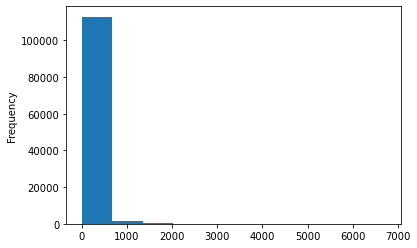

In [64]:
result_olist_customers_orders["price"].plot.hist()

In [65]:
## result_olist_customers_orders = result_olist_customers_orders.head(10)

In [66]:
# kendal, pearson, 
c = result_olist_customers_orders.corr(method = "pearson")
c_sorted = c.sort_values( by=['price'], ascending = False )
c_sorted["price"]

price                       1.000000
payment_value               0.739834
freight_value               0.412115
payment_installments        0.279011
seller_zip_code_prefix      0.088610
customer_zip_code_prefix    0.042217
review_score                0.003598
payment_sequential          0.000054
order_item_id              -0.061123
Name: price, dtype: float64

Text(0, 0.5, 'Pearson Correlation')

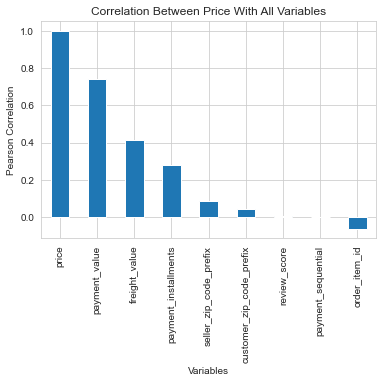

In [67]:
sns.set_style("whitegrid")

c_sorted["price"].plot (kind = "bar")
plt.title("Correlation Between Price With All Variables")
plt.xlabel("Variables")
plt.ylabel("Pearson Correlation")

In [68]:
coba02= pd.DataFrame(data={
    "Kolom01" :[1,np.nan, 3,2,1],
    "Kolom02" :[np.nan, np.nan, 1,2, 3],
    "Kolom03" :[8, np.nan, 1,2, 3]
})

In [69]:
coba02

,Kolom01,Kolom02,Kolom03
0,1.0,NaN,8.0
1,NaN,NaN,NaN
2,3.0,1.0,1.0
3,2.0,2.0,2.0
4,1.0,3.0,3.0


In [70]:
coba02.isnull().sum()

Kolom01    1
Kolom02    2
Kolom03    1
dtype: int64

In [71]:
coba3= coba02.interpolate()
coba3

,Kolom01,Kolom02,Kolom03
0,1.0,NaN,8.0
1,2.0,NaN,4.5
2,3.0,1.0,1.0
3,2.0,2.0,2.0
4,1.0,3.0,3.0


In [72]:
## if all the columns do not contain values then use the following source code :
## olist_orders2 = olist_orders.dropna(how='all')

## else if only some values are missing in the column and you don't want to delete those rows, 
## you can use the following source code: 
## olist_orders2 = olist_orders.fillna(0)

## else if only some values are missing in the column and you want to fill those data with the values in the previous row (duplicates), 
## you can use the following source code :
## olist_orders2 = olist_orders.fillna(method='ffill')

## else if only some values are missing in the column and you want to fill those data with the values in the next row (duplicates), 
## you can use the following source code :
## olist_products2 = olist_products.fillna(method='bfill')

## you can use the following source code :
## olist_products2 = olist_products.interpolate()

## olist_orders2 = olist_orders.dropna()
## olist_orders2.shape